In [34]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import geocoder
import requests
import arrow
import math
import ratelim
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
friday_data = pd.read_csv("week_2016-02-08/summarized_fri.csv")
friday_data.head(100)

,segment_id,day_avg,hour_0_avg,hour_1_avg,hour_2_avg,hour_3_avg,hour_4_avg,hour_5_avg,hour_6_avg,hour_7_avg,...,hour_14_avg,hour_15_avg,hour_16_avg,hour_17_avg,hour_18_avg,hour_19_avg,hour_20_avg,hour_21_avg,hour_22_avg,hour_23_avg
0,68082212617,38,54.0,35.0,NaN,NaN,44.0,NaN,38.0,35.0,...,39.0,28.0,34.0,37.0,33.0,32.0,37.0,37.0,NaN,38.0
1,72175853321,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35500859145,30,NaN,NaN,NaN,NaN,NaN,NaN,33.0,44.0,...,35.0,27.0,32.0,NaN,24.0,20.0,NaN,NaN,NaN,NaN
3,290178745056,46,46.0,24.0,44.0,47.0,63.0,38.0,48.0,66.0,...,42.0,48.0,49.0,39.0,45.0,43.0,37.0,44.0,45.0,50.0
4,30165704457,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,44.0,NaN,35.0,NaN,NaN,NaN,NaN
5,284843590368,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.0,42.0,26.0,8.0,NaN,NaN,40.0,41.0
6,235887927049,74,76.0,53.0,NaN,NaN,NaN,121.0,NaN,42.0,...,78.0,78.0,67.0,67.0,106.0,58.0,89.0,76.0,74.0,82.0
7,93550026505,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,203876998921,39,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.0,33.0,NaN,NaN,31.0,54.0,NaN,36.0,31.0
9,279508435680,53,54.0,79.0,72.0,68.0,62.0,91.0,60.0,53.0,...,56.0,51.0,53.0,45.0,51.0,55.0,51.0,49.0,53.0,56.0


In [21]:
friday_data.shape

(7038, 26)

In [62]:
friday_data["segment_id"].isnull().sum
friday_data["segment_id"].value_counts().index

Int64Index([ 61841088265, 233471754976, 103414776544, 223036579593,
            108817040096, 283434304224, 316351202016, 209044381449,
            241122165472, 298701570784,
            ...
            264006288096,  88516608736, 305311793888, 111031885577,
             45198089993,  69189255904, 231290969865, 231022281440,
            128480190217, 330779607776],
           dtype='int64', length=7038)

In [57]:
friday_data["day_avg"].dtype


dtype('int64')

In [110]:
friday_data.count(axis=0)

segment_id     7038
day_avg        7038
hour_0_avg     3711
hour_1_avg     2235
hour_2_avg     1900
hour_3_avg     1565
hour_4_avg     1443
hour_5_avg     1735
hour_6_avg     2445
hour_7_avg     3348
hour_8_avg     4147
hour_9_avg     4649
hour_10_avg    4700
hour_11_avg    4682
hour_12_avg    4568
hour_13_avg    4219
hour_14_avg    4246
hour_15_avg    4622
hour_16_avg    4606
hour_17_avg    4500
hour_18_avg    4359
hour_19_avg    4219
hour_20_avg    4349
hour_21_avg    4353
hour_22_avg    4145
hour_23_avg    3800
dtype: int64

In [58]:
friday_data["day_avg"].isnull().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7008    False
7009    False
7010    False
7011    False
7012    False
7013    False
7014    False
7015    False
7016    False
7017    False
7018    False
7019    False
7020    False
7021    False
7022    False
7023    False
7024    False
7025    False
7026    False
7027    False
7028    False
7029    False
7030    False
7031    False
7032    False
7033    False
7034    False
7035    False
7036    False
7037    False
Name: day_avg, dtype: bool>

In [59]:
friday_data["day_avg"].value_counts().index

Int64Index([ 42,  40,  37,  38,  35,  48,  47,  33,  41,  32,
            ...
            104, 123, 101,   5, 216, 140, 124, 120, 112, 105],
           dtype='int64', length=117)

(array([   3.,    2.,    5.,    9.,   24.,   31.,   35.,   95.,   86.,
         134.,  180.,  226.,  248.,  294.,  476.,  321.,  377.,  349.,
         355.,  296.,  295.,  452.,  256.,  235.,  212.,  196.,  203.,
         188.,  253.,  160.,  147.,  142.,  126.,  115.,  102.,  132.,
          54.,   40.,   30.,   35.,   24.,   23.,   21.,   11.,    6.,
           7.,    2.,    1.,    1.,    5.,    3.,    1.,    2.,    3.,
           0.,    1.,    1.,    1.,    0.,    0.,    2.,    0.,    0.,
           0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   2.  ,    4.14,    6.28,    8.42,   10.56,   12.7 ,   14.84,
          16.98,   19.12,   21.26,   23.4 ,   25.54,   27.68,   29.82,
          31.96,   34.1 ,   36.24,   38.38,   40.52,   42.66,   44.8

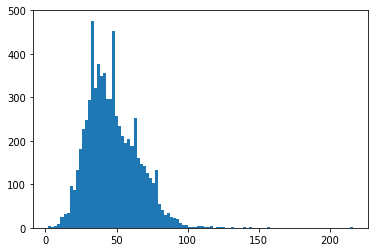

In [72]:
plt.hist(friday_data["day_avg"].astype(float), bins = 100)

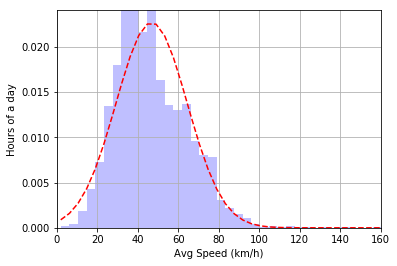

In [109]:
import plotly.plotly as py 
import matplotlib.mlab as mlab


fig = plt.figure()

mu = friday_data["day_avg"].mean()
sigma = friday_data["day_avg"].std()
x = friday_data["day_avg"]

n, bins, patches = plt.hist(x, 50, normed=1, facecolor='blue', alpha=0.25)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Avg Speed (km/h)')
plt.ylabel('Hours of a day')
plt.axis([0, 160, 0, 0.024])

plt.grid(True)

plt.subplots_adjust(left=0.15)